In [1]:
# Python packages
import scanpy as sc
import scvi

# /home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/scvi/_settings.py:63: 
# UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. 
# Run `scvi.settings.seed = 0` to reproduce results from previous versions. self.seed = seed
scvi.settings.seed = 0
sc.settings.verbosity = 3

/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
Global seed set to 0


In [2]:
import bbknn
import scib

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [4]:
# R interface
from rpy2.robjects import pandas2ri
from rpy2.robjects import r
import rpy2.rinterface_lib.callbacks
import anndata2ri

%load_ext rpy2.ipython

In [67]:
pandas2ri.activate()
anndata2ri.activate()


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:368: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/rpy2/robjects/numpy2ri.py:252: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/jobscratch/pbs.394143.headnode/ipykernel_319207/727241874.py:2: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


## Data import

In [5]:
adata1 = sc.read_10x_mtx('/archive/users/ajan/scrna-seq_projects/GEO002_GSE183682_normal-saline_silica-fibrosis_mouse/GSM5567501_NS_7d')

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [6]:
adata2 = sc.read_10x_mtx('/archive/users/ajan/scrna-seq_projects/GEO001_GSE179622_immune-cells_papain_sensitization/cellranger_out/cellranger/count/sample-SRR15058452/outs/filtered_feature_bc_matrix')

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [7]:
adata1

AnnData object with n_obs × n_vars = 7666 × 32285
    var: 'gene_ids', 'feature_types'

In [8]:
adata2

AnnData object with n_obs × n_vars = 8852 × 32285
    var: 'gene_ids', 'feature_types'

In [9]:
adata1.obs

Empty DataFrame
Columns: []
Index: [AAACCTGAGACAGAGA-1, AAACCTGAGCGAAGGG-1, AAACCTGCAATGGTCT-1, AAACCTGCAGAGCCAA-1, AAACCTGCATCACAAC-1, AAACCTGGTAGGCATG-1, AAACCTGGTTATTCTC-1, AAACCTGTCAACACTG-1, AAACCTGTCGTACCGG-1, AAACCTGTCGTTGCCT-1, AAACGGGAGTGTTTGC-1, AAACGGGCAGGATCGA-1, AAACGGGCATTGTGCA-1, AAACGGGGTACATCCA-1, AAACGGGGTAGGGACT-1, AAACGGGGTCGCGAAA-1, AAACGGGGTGATAAAC-1, AAACGGGGTGCAGACA-1, AAACGGGGTGTCTGAT-1, AAACGGGGTTACCGAT-1, AAACGGGGTTAGGGTG-1, AAACGGGTCAAACCAC-1, AAACGGGTCAACGGGA-1, AAACGGGTCACCAGGC-1, AAACGGGTCATGTAGC-1, AAACGGGTCGCCATAA-1, AAACGGGTCGTACGGC-1, AAACGGGTCTTAACCT-1, AAAGATGAGAGCCCAA-1, AAAGATGAGATCCGAG-1, AAAGATGAGGCTCAGA-1, AAAGATGAGGTAGCCA-1, AAAGATGCAAACTGCT-1, AAAGATGCAAGCGCTC-1, AAAGATGCACTCGACG-1, AAAGATGCAGACACTT-1, AAAGATGCAGGACCCT-1, AAAGATGCATTAGCCA-1, AAAGATGGTAACGACG-1, AAAGATGGTTACGCGC-1, AAAGATGGTTCCACGG-1, AAAGATGTCTCTGAGA-1, AAAGCAAAGATCACGG-1, AAAGCAAAGATGCCAG-1, AAAGCAAAGCCCAGCT-1, AAAGCAAAGCTGTCTA-1, AAAGCAAAGGTGCTTT-1, AAAGCAAAGTACGCGA-1, AAAGCAAAGTCTCCTC-1, AAAGCAAAGTGAAGAG-1, AAAGCAACAAACTGTC-1, AAAGCAAGTCGCTTCT-1, AAAGCAAGTCTAAAGA-1, AAAGCAAGTGACCAAG-1, AAAGCAATCCTAAGTG-1, AAAGCAATCGGTGTTA-1, AAAGCAATCGTTGACA-1, AAAGCAATCTTGCCGT-1, AAAGTAGAGATGCCAG-1, AAAGTAGAGCCCAGCT-1, AAAGTAGAGGAATCGC-1, AAAGTAGCAAAGTGCG-1, AAAGTAGCAACGATCT-1, AAAGTAGCAACGCACC-1, AAAGTAGCACGGTAAG-1, AAAGTAGCATAGAAAC-1, AAAGTAGCATCGGTTA-1, AAAGTAGGTACATCCA-1, AAAGTAGGTCGAATCT-1, AAAGTAGGTCTAGAGG-1, AAAGTAGGTCTGGAGA-1, AAAGTAGGTTCTGGTA-1, AAAGTAGTCACATAGC-1, AAAGTAGTCAGCTTAG-1, AAAGTAGTCCGCAGTG-1, AAAGTAGTCCTAAGTG-1, AAAGTAGTCGATAGAA-1, AAAGTAGTCTGTCTCG-1, AAATGCCAGAGTTGGC-1, AAATGCCAGCCGCCTA-1, AAATGCCAGCGATAGC-1, AAATGCCAGCTTTGGT-1, AAATGCCAGGCAGGTT-1, AAATGCCCACAACGTT-1, AAATGCCCACTTGGAT-1, AAATGCCCAGACGCAA-1, AAATGCCCAGATGGCA-1, AAATGCCCATCCTAGA-1, AAATGCCGTACCGCTG-1, AAATGCCGTATGAATG-1, AAATGCCGTCTAGCCG-1, AAATGCCGTCTAGGTT-1, AAATGCCGTGGTGTAG-1, AAATGCCTCAAAGTAG-1, AAATGCCTCGTCTGCT-1, AAATGCCTCTCAACTT-1, AACACGTAGAAGATTC-1, AACACGTAGACAGAGA-1, AACACGTAGGTGATTA-1, AACACGTCAACTTGAC-1, ...]

[7666 rows x 0 columns]

In [10]:
adata2.obs

Empty DataFrame
Columns: []
Index: [AAACCCAAGACTACGG-1, AAACCCAAGGGCAAGG-1, AAACCCAAGTCCCGGT-1, AAACCCACAAGACAAT-1, AAACCCACACCATTCC-1, AAACCCACAGCTCTGG-1, AAACCCACATCGTTCC-1, AAACCCAGTATGGTAA-1, AAACCCAGTTATCTGG-1, AAACCCAGTTGAGTCT-1, AAACCCATCGTGCGAC-1, AAACGAACAGGTACGA-1, AAACGAACATCCGGCA-1, AAACGAACATGTTCAG-1, AAACGAATCTGTCTCG-1, AAACGCTAGGTACCTT-1, AAACGCTCATGACTTG-1, AAACGCTGTCCAAAGG-1, AAACGCTGTTAGTCGT-1, AAACGCTTCCAACTAG-1, AAACGCTTCCGATAGT-1, AAACGCTTCGAACGCC-1, AAAGAACAGACAGCGT-1, AAAGAACAGGACACTG-1, AAAGAACCAAATGATG-1, AAAGAACCAACACAAA-1, AAAGAACGTACTGCCG-1, AAAGAACGTCATGCAT-1, AAAGAACGTCTACAGT-1, AAAGAACGTGTCTTGA-1, AAAGAACGTTCTGAGT-1, AAAGAACTCAAAGAAC-1, AAAGAACTCACAAGAA-1, AAAGAACTCAGCCTTC-1, AAAGAACTCTTTCTAG-1, AAAGGATAGTAGCATA-1, AAAGGATCATATGAAG-1, AAAGGATCATGACAAA-1, AAAGGATGTCAGTCCG-1, AAAGGATGTCTAACTG-1, AAAGGATGTCTTTATC-1, AAAGGATGTTCGGGTC-1, AAAGGATTCATCACCC-1, AAAGGGCAGCAAATGT-1, AAAGGGCCAACATACC-1, AAAGGGCCACATACGT-1, AAAGGTAAGCCAAGGT-1, AAAGGTAAGCGAGAAA-1, AAAGGTACAAATTGCC-1, AAAGGTACACCATAAC-1, AAAGGTAGTCAAGCGA-1, AAAGGTATCCTGATAG-1, AAAGTCCAGACGTCCC-1, AAAGTCCAGCCGAACA-1, AAAGTCCAGCTGCCTG-1, AAAGTCCAGTGCAAAT-1, AAAGTCCCAAAGCTAA-1, AAAGTCCCAATAACGA-1, AAAGTCCCACAGCGCT-1, AAAGTCCCACTTCTCG-1, AAAGTCCCAGTCACGC-1, AAAGTCCGTACGACTT-1, AAAGTCCTCATATGGC-1, AAAGTCCTCCATAGAC-1, AAAGTCCTCCCGTAAA-1, AAAGTGAAGCGTTCAT-1, AAAGTGAAGGTCACAG-1, AAAGTGACAATAGAGT-1, AAAGTGAGTACGCGTC-1, AAAGTGAGTATCGCTA-1, AAAGTGAGTGATTCAC-1, AAAGTGATCCTCTCTT-1, AAATGGAAGAGAGTTT-1, AAATGGAAGCCAAGCA-1, AAATGGAAGCTAGAGC-1, AAATGGAAGGGCAATC-1, AAATGGACACCCTGAG-1, AAATGGAGTCAGCTTA-1, AAATGGAGTCGAATGG-1, AAATGGAGTCGGCCTA-1, AAATGGAGTTGTTGTG-1, AAATGGATCCATCACC-1, AAATGGATCGTGGAAG-1, AACAAAGAGTAACAGT-1, AACAAAGAGTCCTACA-1, AACAAAGCAAAGGGCT-1, AACAAAGCACGCACCA-1, AACAAAGCATCAACCA-1, AACAAAGGTGTGTACT-1, AACAAAGTCATGCAGT-1, AACAAAGTCCCATAGA-1, AACAAAGTCTGAGAAA-1, AACAAAGTCTGGTTGA-1, AACAAAGTCTTACGTT-1, AACAACCAGACATCCT-1, AACAACCAGGGAGGGT-1, AACAACCAGGTAGTCG-1, AACAACCCAAACCGGA-1, AACAACCCAACACGTT-1, AACAACCCAACGCCCA-1, ...]

[8852 rows x 0 columns]

In [11]:
adata1.var

gene_ids    feature_types
Xkr4        ENSMUSG00000051951  Gene Expression
Gm1992      ENSMUSG00000089699  Gene Expression
Gm19938     ENSMUSG00000102331  Gene Expression
Gm37381     ENSMUSG00000102343  Gene Expression
Rp1         ENSMUSG00000025900  Gene Expression
...                        ...              ...
AC124606.1  ENSMUSG00000095523  Gene Expression
AC133095.2  ENSMUSG00000095475  Gene Expression
AC133095.1  ENSMUSG00000094855  Gene Expression
AC234645.1  ENSMUSG00000095019  Gene Expression
AC149090.1  ENSMUSG00000095041  Gene Expression

[32285 rows x 2 columns]

In [12]:
adata2.var

gene_ids    feature_types
Xkr4        ENSMUSG00000051951  Gene Expression
Gm1992      ENSMUSG00000089699  Gene Expression
Gm19938     ENSMUSG00000102331  Gene Expression
Gm37381     ENSMUSG00000102343  Gene Expression
Rp1         ENSMUSG00000025900  Gene Expression
...                        ...              ...
AC124606.1  ENSMUSG00000095523  Gene Expression
AC133095.2  ENSMUSG00000095475  Gene Expression
AC133095.1  ENSMUSG00000094855  Gene Expression
AC234645.1  ENSMUSG00000095019  Gene Expression
AC149090.1  ENSMUSG00000095041  Gene Expression

[32285 rows x 2 columns]

normalizing counts per cell
    finished (0:00:00)


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


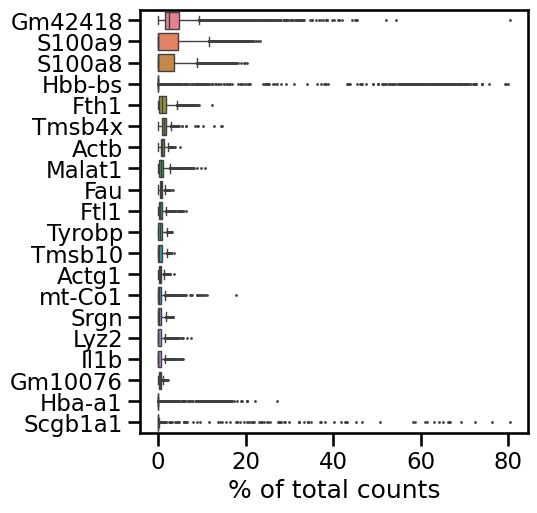

In [13]:
# Visualize the top 20 most highly-expressed genes in each dataset
sc.pl.highest_expr_genes(adata1, n_top=20)

normalizing counts per cell
    finished (0:00:00)


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


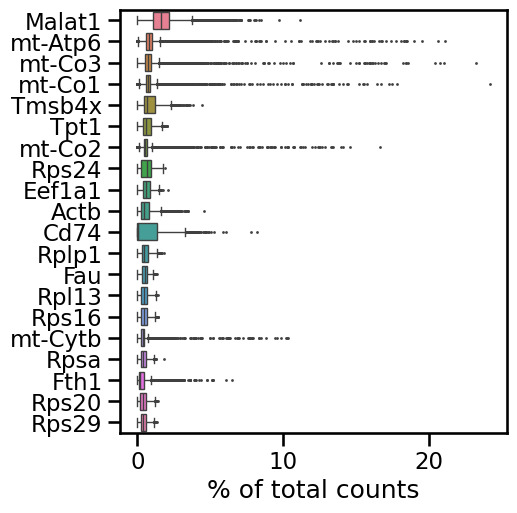

In [14]:
sc.pl.highest_expr_genes(adata2, n_top=20)

In [15]:
# Concatenate the two AnnData objects
adata_combined = adata1.concatenate(adata2, batch_key='batch', batch_categories=['batch1', 'batch2'])

/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/anndata/_core/anndata.py:1823: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [16]:
adata_combined.obs.head

<bound method NDFrame.head of                             batch
AAACCTGAGACAGAGA-1-batch1  batch1
AAACCTGAGCGAAGGG-1-batch1  batch1
AAACCTGCAATGGTCT-1-batch1  batch1
AAACCTGCAGAGCCAA-1-batch1  batch1
AAACCTGCATCACAAC-1-batch1  batch1
...                           ...
TTTGTTGGTTAAGTCC-1-batch2  batch2
TTTGTTGTCACGATCA-1-batch2  batch2
TTTGTTGTCATGCATG-1-batch2  batch2
TTTGTTGTCGATGCTA-1-batch2  batch2
TTTGTTGTCTCATGCC-1-batch2  batch2

[16518 rows x 1 columns]>

In [17]:
adata_combined.obs["batch"].value_counts()

batch2    8852
batch1    7666
Name: batch, dtype: int64

In [18]:
adata_combined.var["feature_types"].value_counts()

Gene Expression    32285
Name: feature_types, dtype: int64

In [19]:
adata_combined

AnnData object with n_obs × n_vars = 16518 × 32285
    obs: 'batch'
    var: 'gene_ids', 'feature_types'

In [20]:
sc.pp.filter_genes(adata_combined, min_cells=1)

filtered out 7791 genes that are detected in less than 1 cells


In [21]:
adata_combined

AnnData object with n_obs × n_vars = 16518 × 24494
    obs: 'batch'
    var: 'gene_ids', 'feature_types', 'n_cells'

In [22]:
adata_combined.var

gene_ids    feature_types  n_cells
Xkr4            ENSMUSG00000051951  Gene Expression      120
Gm37381         ENSMUSG00000102343  Gene Expression       10
Rp1             ENSMUSG00000025900  Gene Expression       30
Sox17           ENSMUSG00000025902  Gene Expression       51
Gm37587         ENSMUSG00000104238  Gene Expression        3
...                            ...              ...      ...
CR974586.4      ENSMUSG00000096506  Gene Expression        3
4933409K07Rik   ENSMUSG00000095552  Gene Expression        2
CT868723.1      ENSMUSG00000096237  Gene Expression        1
CAAA01147332.1  ENSMUSG00000095742  Gene Expression      226
AC149090.1      ENSMUSG00000095041  Gene Expression     4410

[24494 rows x 3 columns]

In [23]:
adata_combined.layers["counts"] = adata_combined.X.copy()
sc.pp.normalize_total(adata_combined)
sc.pp.log1p(adata_combined)
adata_combined.layers["logcounts"] = adata_combined.X.copy()

normalizing counts per cell
    finished (0:00:00)


In [24]:
adata = adata_combined.copy()

## Annotation

In [25]:
marker_genes = {
    "CD14+ Mono": ["Fcn1", "Cd14"],
    "CD16+ Mono": ["Tcf7l2", "Fcgr3", "Lyn"],
    "ID2-hi myeloid prog": [
        "Cd14",
        "Id2",
        "Vcan",
        "S100a9",
        "Clec12a",
        "Klf4",
        "Plaur",
    ],
    "cDC1": ["Clec9a", "Cadm1"],
    "cDC2": [
        "Cst3",
        "Cotl1",
        "Lyz2",
        "Dmxl2",
        "Clec10a",
        "Fcer1a",
    ],  
    "Normoblast": ["Slc4a1", "Slc25a37", "Hbb-bs", "Hba-a2", "Hba-a1", "Tfrc"],
    "Erythroblast": ["Mki67", "Hba-a1", "Hbb-bs"],
    "Proerythroblast": [
        "Cdk6",
        "Syngr1",
        "Hbb-bh1", 
        "Gypa",
    ],  
    "NK": ["Gnly", "Nkg7", "Cd247", "Grik4", "Fcer1g", "Tyrobp", "Klrg1", "Fcgr3"],
    "ILC": ["Id2", "Plcg2", "Gnly", "Syne1"],
    "Lymph prog": [
        "Vpreb1",
        "Mme",
        "Ebf1",
        "Ssbp2",
        "Bach2",
        "Cd79b",
        "Ighm",
        "Pax5",
        "Prkce",
        "Dntt",
        "Igll1",
    ],
    "Naive CD20+ B": ["Ms4a1", "Il4r", "Ighd", "Fcrl1", "Ighm"],
    "B1 B": [
        "Ms4a1",
        "Sspn",
        "Itgb1",
        "Epha4",
        "Col4a4",
        "Prdm1",
        "Irf4",
        "Cd38",
        "Xbp1",
        "Pax5",
        "Bcl11a",
        "Blk",
        "Ighd",
        "Ighm",
        "Zfp215",
    ],  
    "Transitional B": ["Mme", "Cd38", "Cd24", "Acsm3", "Msi2"],
    "Plasma cells": ["Mzb1", "Hsp90b1", "Fndc3b", "Prdm1", "Igkc", "Jchain"],
    "Plasmablast": ["Xbp1", "Rf4", "Prdm1", "Pax5"],  
    "CD4+ T activated": ["Cd4", "Il7r", "Trbc2", "Itgb1"],
    "CD4+ T naive": ["Cd4", "Il7r", "Trbc2", "Ccr7"],
    "CD8+ T": ["Cd8a", "Cd8b", "Gzmk", "Gzma", "Ccl5", "Gzmb", "Gzmh", "Gzma"],
    "T activation": ["Cd69", "Cd38"],  
    "T naive": ["Lef1", "Ccr7", "Tcf7"],
    "pDC": ["Gzmb", "Il3ra", "Cobll1", "Tcf4"],
    "G/M prog": ["Mpo", "Bcl2", "Kcnq5", "Csf3r"],
    "HSC": ["Nrip1", "Mecom", "Prom1", "Nkain2", "Cd34"],
    "MK/E prog": [
        "Zfp385d",
        "Itga2b",
        "Ryr3",
        "Plcb1",
    ],  
}


In [26]:
marker_genes_in_data = dict()
for ct, markers in marker_genes.items():
    markers_found = list()
    for marker in markers:
        if marker in adata.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

In [27]:
adata.X = adata.layers["logcounts"]

In [28]:
sc.pp.highly_variable_genes(adata)

extracting highly variable genes


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/relea

    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [29]:
sc.tl.pca(adata, n_comps=50, use_highly_variable=True)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


In [30]:
sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:16)


In [31]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


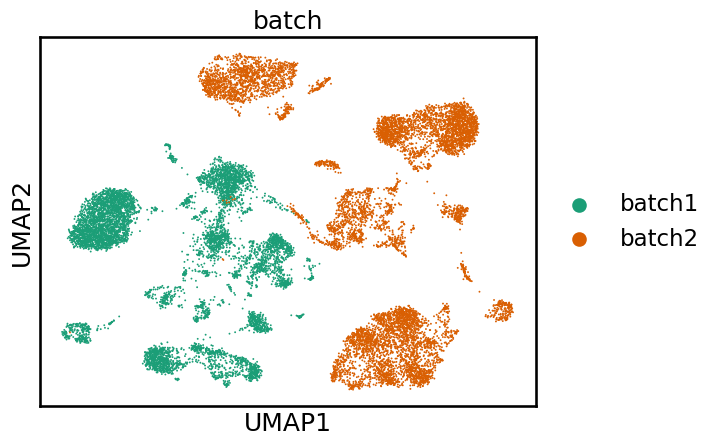

In [32]:
adata.uns["batch" + "_colors"] = [
    "#1b9e77",
    "#d95f02"
]  # Set custom colours for batches
sc.pl.umap(adata, color=["batch"], wspace=1)

In [33]:
batch_key = "batch"

In [34]:
sc.pp.highly_variable_genes(
    adata, n_top_genes=2000, flavor="cell_ranger", batch_key=batch_key
)
adata
adata.var

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


gene_ids    feature_types  n_cells  highly_variable  \
Xkr4            ENSMUSG00000051951  Gene Expression      120            False   
Gm37381         ENSMUSG00000102343  Gene Expression       10            False   
Rp1             ENSMUSG00000025900  Gene Expression       30            False   
Sox17           ENSMUSG00000025902  Gene Expression       51             True   
Gm37587         ENSMUSG00000104238  Gene Expression        3            False   
...                            ...              ...      ...              ...   
CR974586.4      ENSMUSG00000096506  Gene Expression        3            False   
4933409K07Rik   ENSMUSG00000095552  Gene Expression        2            False   
CT868723.1      ENSMUSG00000096237  Gene Expression        1            False   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression      226            False   
AC149090.1      ENSMUSG00000095041  Gene Expression     4410            False   

                   means  dispersions  dispersions_norm  \
Xkr4            0.001956     1.124389          0.200032   
Gm37381         0.000301     0.709419         -0.152104   
Rp1             0.001341     0.771247         -0.185378   
Sox17           0.003989     1.101488          1.927412   
Gm37587         0.000181     0.469336         -0.228151   
...                  ...          ...               ...   
CR974586.4      0.000120     0.351093         -0.343897   
4933409K07Rik   0.000033     0.214812          0.677097   
CT868723.1      0.000077     0.586479          0.760318   
CAAA01147332.1  0.007952     0.647908         -1.725382   
AC149090.1      0.162874     0.887563          0.748979   

                highly_variable_nbatches  highly_variable_intersection  
Xkr4                                   0                         False  
Gm37381                                0                         False  
Rp1                                    0                         False  
Sox17                                  1                         False  
Gm37587                                0                         False  
...                                  ...                           ...  
CR974586.4                             0                         False  
4933409K07Rik                          0                         False  
CT868723.1                             0                         False  
CAAA01147332.1                         0                         False  
AC149090.1                             0                         False  

[24494 rows x 9 columns]

0    21035
1     2918
2      541
Name: highly_variable_nbatches, dtype: int64

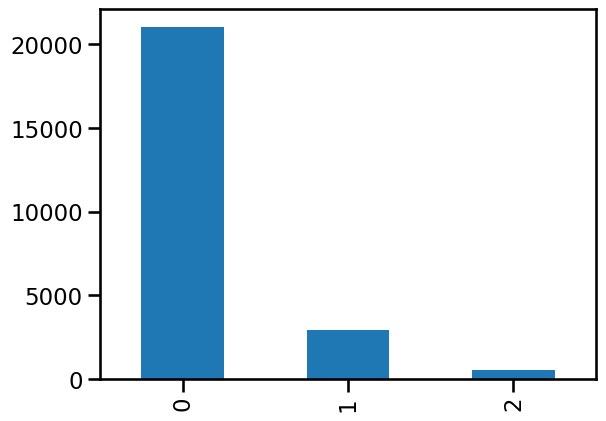

In [35]:
n_batches = adata.var["highly_variable_nbatches"].value_counts()
ax = n_batches.plot(kind="bar")
n_batches

In [36]:
sc.tl.leiden(adata, resolution=0.5, key_added="leiden_0.5")

running Leiden clustering
    finished: found 23 clusters and added
    'leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:03)


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


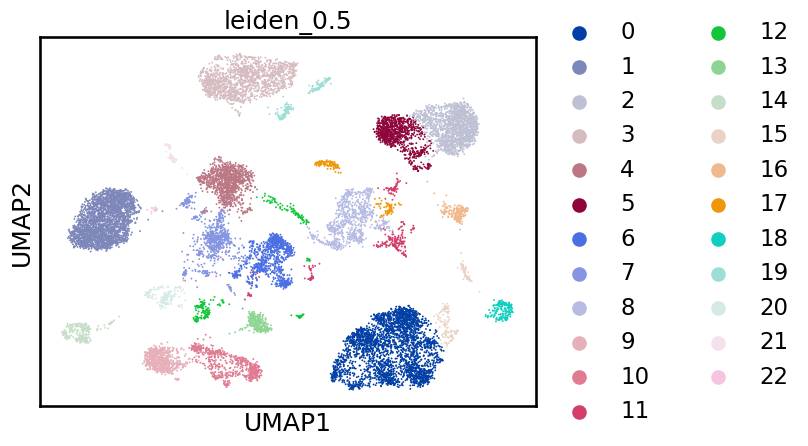

In [37]:
sc.pl.umap(adata, color="leiden_0.5")

{'CD14+ Mono': ['Cd14'], 'CD16+ Mono': ['Tcf7l2', 'Fcgr3', 'Lyn'], 'ID2-hi myeloid prog': ['Cd14', 'Id2', 'Vcan', 'S100a9', 'Clec12a', 'Klf4', 'Plaur'], 'cDC1': ['Clec9a', 'Cadm1'], 'cDC2': ['Cst3', 'Cotl1', 'Lyz2', 'Dmxl2', 'Clec10a', 'Fcer1a'], 'Normoblast': ['Slc4a1', 'Slc25a37', 'Hbb-bs', 'Hba-a2', 'Hba-a1', 'Tfrc'], 'Erythroblast': ['Mki67', 'Hba-a1', 'Hbb-bs'], 'Proerythroblast': ['Cdk6', 'Syngr1', 'Hbb-bh1', 'Gypa'], 'NK': ['Nkg7', 'Cd247', 'Grik4', 'Fcer1g', 'Tyrobp', 'Klrg1', 'Fcgr3'], 'ILC': ['Id2', 'Plcg2', 'Syne1'], 'Lymph prog': ['Vpreb1', 'Mme', 'Ebf1', 'Ssbp2', 'Bach2', 'Cd79b', 'Ighm', 'Pax5', 'Prkce', 'Dntt', 'Igll1'], 'Naive CD20+ B': ['Ms4a1', 'Ighd', 'Fcrl1', 'Ighm'], 'B1 B': ['Ms4a1', 'Sspn', 'Itgb1', 'Epha4', 'Col4a4', 'Prdm1', 'Irf4', 'Cd38', 'Xbp1', 'Pax5', 'Bcl11a', 'Blk', 'Ighd', 'Ighm'], 'Transitional B': ['Mme', 'Cd38', 'Acsm3', 'Msi2'], 'Plasma cells': ['Mzb1', 'Hsp90b1', 'Fndc3b', 'Prdm1', 'Igkc', 'Jchain'], 'Plasmablast': ['Xbp1', 'Prdm1', 'Pax5'], 'CD4+ 

/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


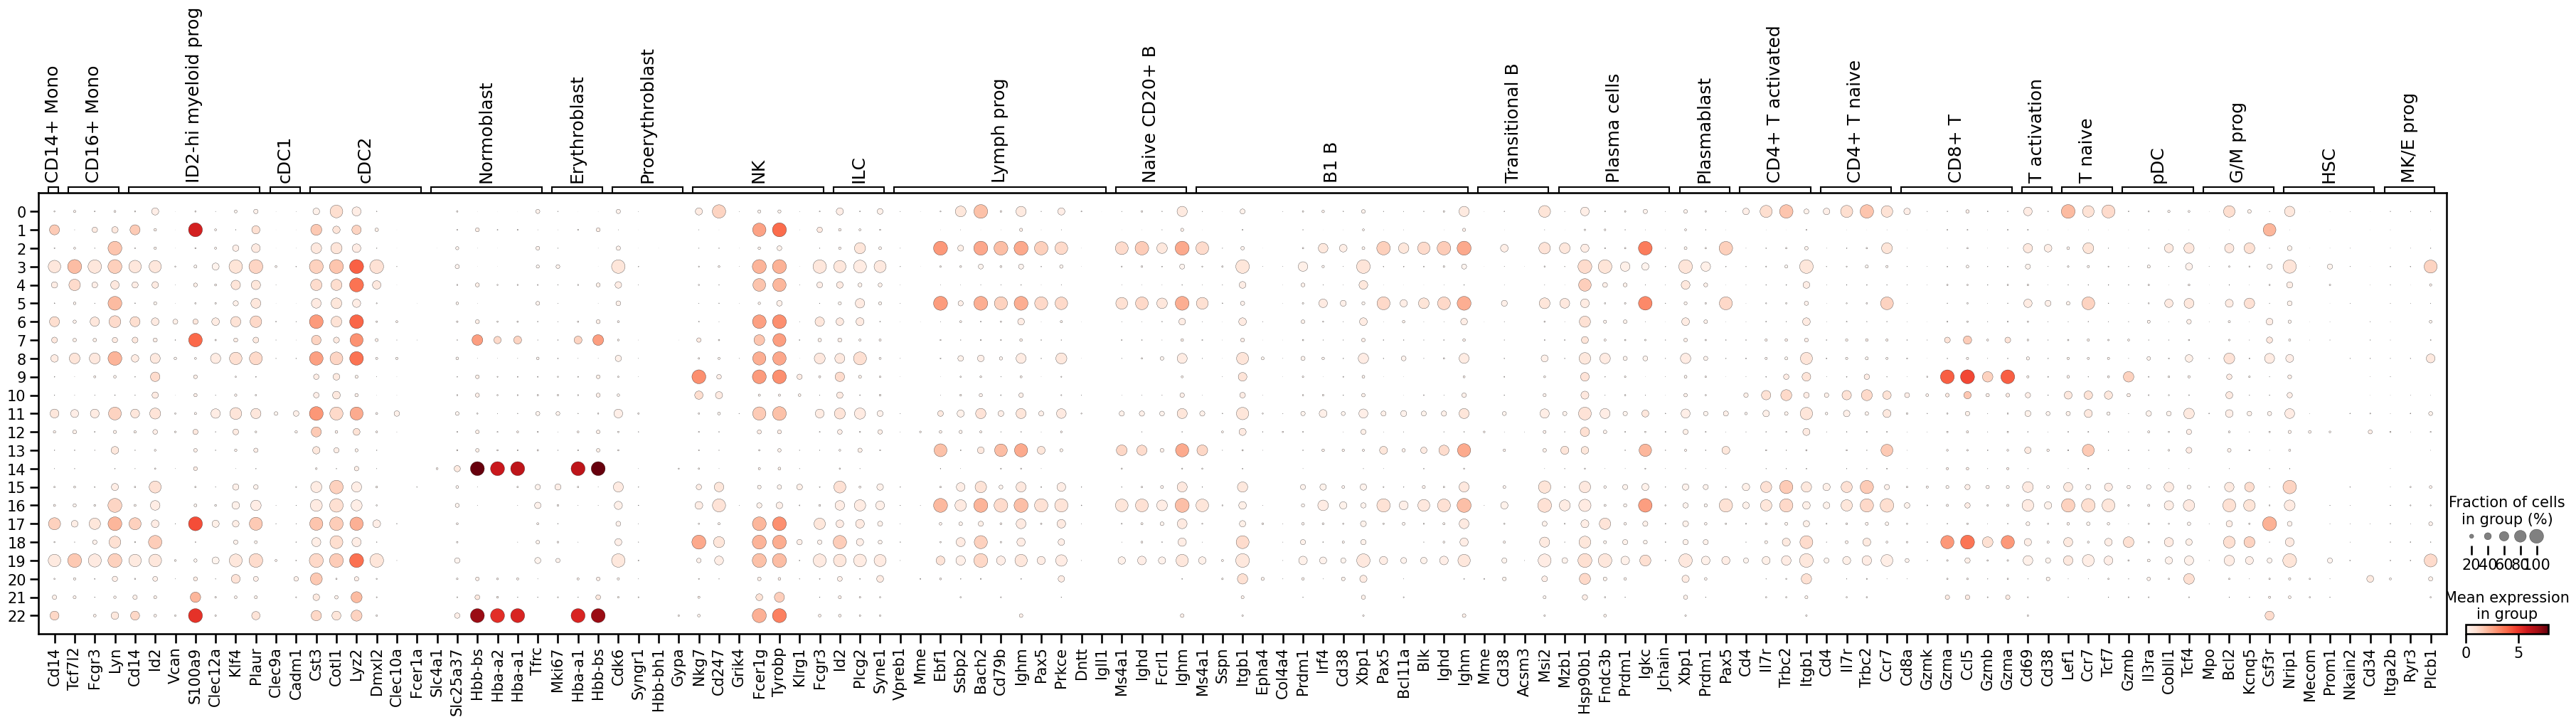

In [38]:
# Filter out genes not present in adata
filtered_marker_genes = {cell_type: [gene for gene in genes if gene in adata.var_names]
                         for cell_type, genes in marker_genes.items()}

# Print to see which genes are included after filtering
print(filtered_marker_genes)

# Then plot
sc.pl.dotplot(adata, filtered_marker_genes, groupby='leiden_0.5')


In [39]:
cluster_to_cell_type = {
    "0": "T cell",
    "1": "NK",
    "2": "B cell",
    "3": "Monocyte",
    "4": "DC",
    "5": "Plasma",
    "6": "DC",
    "7": "NK",
    "8": "NK",
    "9": "Unknown",
    "10": "T cell",
    "11": "DC",
    "12": "Unknown",
    "13": "B cell",
    "14": "Erythroblast",
    "15": "T cell",
    "16": "NK",
    "17": "NK",
    "18": "DC",
    "19": "DC",
    "20": "Unknown",
    "21": "DC",
    "22": "Erythroblast",
}


                          leiden_0.5 cell_type
AAACCTGAGACAGAGA-1-batch1          1        NK
AAACCTGAGCGAAGGG-1-batch1         10    T cell
AAACCTGCAATGGTCT-1-batch1          1        NK
AAACCTGCAGAGCCAA-1-batch1          1        NK
AAACCTGCATCACAAC-1-batch1          1        NK


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


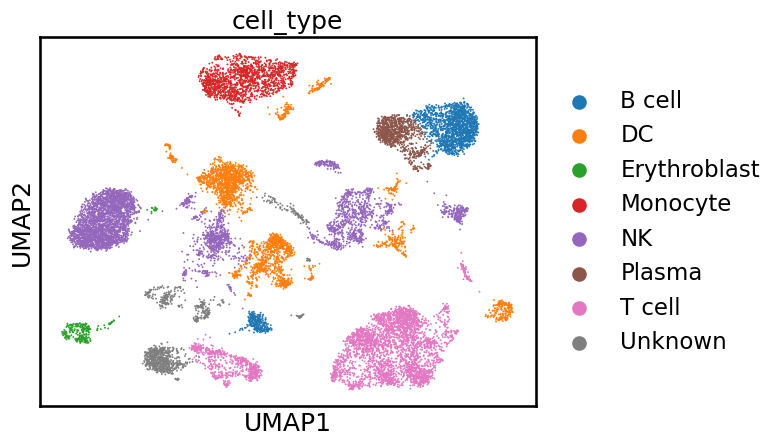

In [40]:
# Step 2: Map this dictionary to the 'leiden' column in your AnnData's obs dataframe
# This will create a new column with the cell type annotations for each cell
adata.obs['cell_type'] = adata.obs['leiden_0.5'].map(cluster_to_cell_type)

# Print to verify that the mapping is successful
print(adata.obs[['leiden_0.5', 'cell_type']].head())

# Step 3: You can then plot these annotations on a UMAP plot or similar
sc.pl.umap(adata, color='cell_type')

## Integration & Batch-aware feature selection

In [44]:
batch_key = 'batch'
label_key = 'cell_type'

/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


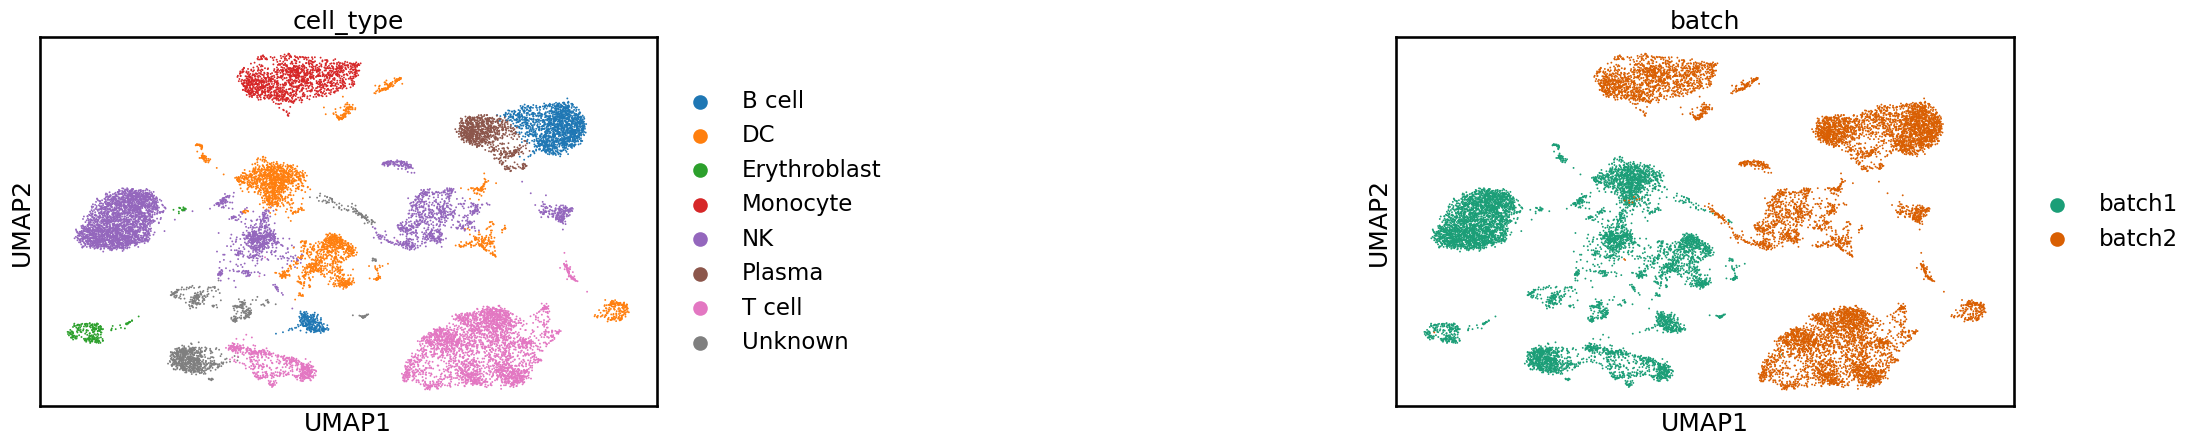

In [45]:
adata.uns[batch_key + "_colors"] = [
    "#1b9e77",
    "#d95f02"
]  # Set custom colours for batches
sc.pl.umap(adata, color=[label_key, batch_key], wspace=1)

In [46]:
adata_hvg = adata[:, adata.var["highly_variable"]].copy()
adata_hvg

AnnData object with n_obs × n_vars = 16518 × 2000
    obs: 'batch', 'leiden_0.5', 'cell_type'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'batch_colors', 'leiden', 'leiden_0.5_colors', 'cell_type_colors', 'batch_key_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'logcounts'
    obsp: 'distances', 'connectivities'

## Variational autoencoder (VAE) based integration

In [47]:
adata_scvi = adata_hvg.copy()

In [48]:
adata_scvi.X

<16518x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 2846621 stored elements in Compressed Sparse Row format>

In [49]:
scvi.model.SCVI.setup_anndata(adata_scvi, layer="counts", batch_key=batch_key)
adata_scvi

<frozen abc>:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.



AnnData object with n_obs × n_vars = 16518 × 2000
    obs: 'batch', 'leiden_0.5', 'cell_type', '_scvi_batch', '_scvi_labels'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'batch_colors', 'leiden', 'leiden_0.5_colors', 'cell_type_colors', 'batch_key_colors', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'logcounts'
    obsp: 'distances', 'connectivities'

In [50]:
model_scvi = scvi.model.SCVI(adata_scvi)
model_scvi

SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal
Training status: Not Trained
Model's adata is minified?: False

In [51]:
model_scvi.view_anndata_setup()

Anndata setup with scvi-tools version 1.0.4.

Setup via `SCVI.setup_anndata` with arguments:

{
│   'layer': 'counts',
│   'batch_key': 'batch',
│   'labels_key': None,
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   2   │
│         n_cells          │ 16518 │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │   1   │
│          n_vars          │ 2000  │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │  adata.layers['counts']   │
│    batch     │ adata.obs['_scvi_batch']  │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                  batch State Registry                   
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃  Source Location   ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch'] │   batch1   │          0          │
│                    │   batch2   │          1          │
└────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

In [52]:
max_epochs_scvi = np.min([round((20000 / adata.n_obs) * 400), 400])
max_epochs_scvi

400

In [53]:
model_scvi.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/400:   0%|                                                                                                                                                                 | 0/400 [00:00<?, ?it/s]

<frozen abc>:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.



Epoch 400/400: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [11:02<00:00,  1.65s/it, v_num=1, train_loss_step=672, train_loss_epoch=553]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [11:02<00:00,  1.66s/it, v_num=1, train_loss_step=672, train_loss_epoch=553]


In [54]:
adata_scvi.obsm["X_scVI"] = model_scvi.get_latent_representation()

In [55]:
sc.pp.neighbors(adata_scvi, use_rep="X_scVI")
sc.tl.umap(adata_scvi)
adata_scvi

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)


AnnData object with n_obs × n_vars = 16518 × 2000
    obs: 'batch', 'leiden_0.5', 'cell_type', '_scvi_batch', '_scvi_labels'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'batch_colors', 'leiden', 'leiden_0.5_colors', 'cell_type_colors', 'batch_key_colors', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'X_pca', 'X_umap', 'X_scVI'
    varm: 'PCs'
    layers: 'counts', 'logcounts'
    obsp: 'distances', 'connectivities'

/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


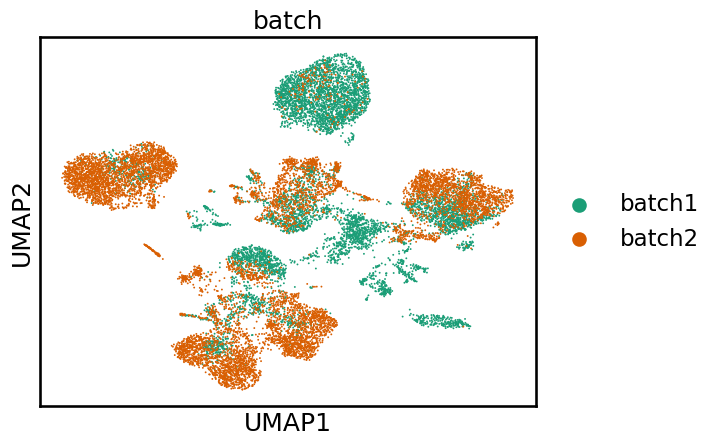

In [56]:
sc.pl.umap(adata_scvi, color=[batch_key], wspace=1)

## VAE integration using cell labels

In [57]:
# Normally we would need to run scVI first but we have already done that here
# model_scvi = scvi.model.SCVI(adata_scvi) etc.
model_scanvi = scvi.model.SCANVI.from_scvi_model(
    model_scvi, labels_key=label_key, unlabeled_category="Unknown"
)
print(model_scanvi)
model_scanvi.view_anndata_setup()

ScanVI Model with the following params: 
unlabeled_category: Unknown, n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, 
gene_likelihood: zinb
Training status: Not Trained
Model's adata is minified?: False

Anndata setup with scvi-tools version 1.0.4.

Setup via `SCANVI.setup_anndata` with arguments:

{
│   'labels_key': 'cell_type',
│   'unlabeled_category': 'Unknown',
│   'layer': 'counts',
│   'batch_key': 'batch',
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   2   │
│         n_cells          │ 16518 │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │   8   │
│          n_vars          │ 2000  │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │  adata.layers['counts']   │
│    batch     │ adata.obs['_scvi_batch']  │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                  batch State Registry                   
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃  Source Location   ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch'] │   batch1   │          0          │
│                    │   batch2   │          1          │
└────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                     
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃  Categories  ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['cell_type'] │    B cell    │          0          │
│                        │      DC      │          1          │
│                        │ Erythroblast │          2          │
│                        │   Monocyte   │          3          │
│                        │      NK      │          4          │
│                        │    Plasma    │          5          │
│                        │    T cell    │          6          │
│                        │   Unknown    │          7          │
└────────────────────────┴──────────────┴─────────────────────┘

In [58]:
max_epochs_scanvi = int(np.min([10, np.max([2, round(max_epochs_scvi / 3.0)])]))
model_scanvi.train(max_epochs=max_epochs_scanvi)

INFO     Training for 10 epochs.                                                                                   


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 10/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:29<00:00,  2.89s/it, v_num=1, train_loss_step=563, train_loss_epoch=595]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 10/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:29<00:00,  2.94s/it, v_num=1, train_loss_step=563, train_loss_epoch=595]


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


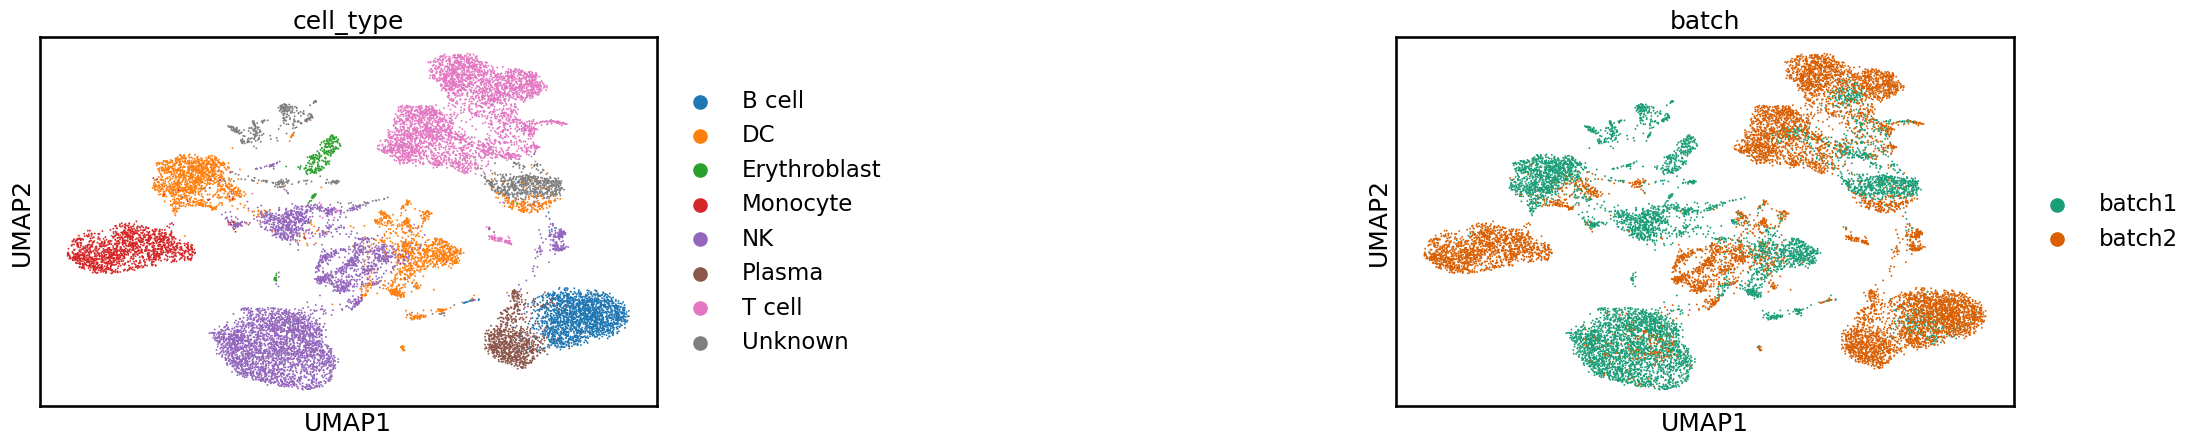

In [59]:
adata_scanvi = adata_scvi.copy()
adata_scanvi.obsm["X_scANVI"] = model_scanvi.get_latent_representation()
sc.pp.neighbors(adata_scanvi, use_rep="X_scANVI")
sc.tl.umap(adata_scanvi)
sc.pl.umap(adata_scanvi, color=[label_key, batch_key], wspace=1)

## Graph-based integration

In [60]:
neighbors_within_batch = 25 if adata_hvg.n_obs > 100000 else 3
neighbors_within_batch

3

In [61]:
adata_bbknn = adata_hvg.copy()
adata_bbknn.X = adata_bbknn.layers["logcounts"].copy()
sc.pp.pca(adata_bbknn)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


In [62]:
bbknn.bbknn(
    adata_bbknn, batch_key=batch_key, neighbors_within_batch=neighbors_within_batch
)
adata_bbknn

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


AnnData object with n_obs × n_vars = 16518 × 2000
    obs: 'batch', 'leiden_0.5', 'cell_type'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'batch_colors', 'leiden', 'leiden_0.5_colors', 'cell_type_colors', 'batch_key_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'logcounts'
    obsp: 'distances', 'connectivities'

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


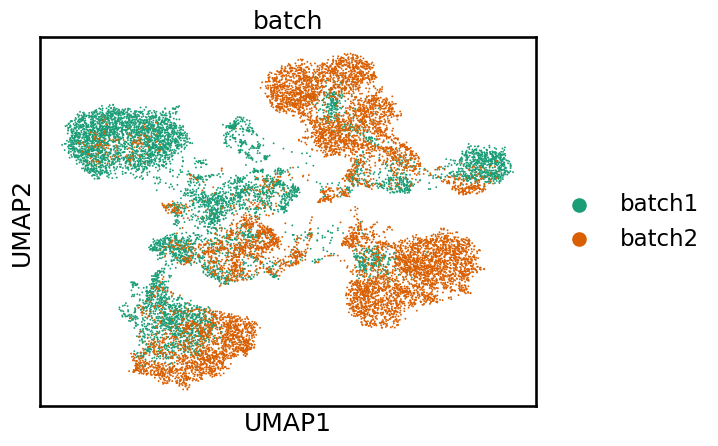

In [63]:
sc.tl.umap(adata_bbknn)
sc.pl.umap(adata_bbknn, color=[batch_key], wspace=1)

## Linear embedding integration using Mutual Nearest Neighbors (MNN)

In [64]:
%%R
# R packages
library("Seurat")



    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/rpy2/ipython/rmagic.py:984: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  displaypub.publish_display_data(


The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
Attaching SeuratObject


In [65]:
adata_seurat = adata_hvg.copy()
# Convert categorical columns to strings
adata_seurat.obs[batch_key] = adata_seurat.obs[batch_key].astype(str)
adata_seurat.obs[label_key] = adata_seurat.obs[label_key].astype(str)
# Delete uns as this can contain arbitrary objects which are difficult to convert
del adata_seurat.uns
adata_seurat

AnnData object with n_obs × n_vars = 16518 × 2000
    obs: 'batch', 'leiden_0.5', 'cell_type'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'logcounts'
    obsp: 'distances', 'connectivities'

In [99]:
import pandas as pd
from rpy2.robjects import pandas2ri
%load_ext rpy2.ipython

# Extract the expression data as a DataFrame
expr_data = pd.DataFrame(adata_seurat.X.todense(), 
                         index=adata_seurat.obs.index, 
                         columns=adata_seurat.var.index)

# Activate the pandas conversion for rpy2
pandas2ri.activate()

# Pass the data to R and print it
%R -i expr_data
%R print(head(t(expr_data)))


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:368: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '


              AAACCTGAGACAGAGA-1-batch1 AAACCTGAGCGAAGGG-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              AAACCTGCAATGGTCT-1-batch1 AAACCTGCAGAGCCAA-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              AAACCTGCATCACAAC-1-batch1 AAACCTGGTAGGCATG-1-batch1
Sox17     

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              AGAGCTTCATACGCCG-1-batch1 AGAGCTTCATGGTAGG-1-batch1
Sox17                          0.000000                         0
1700034P13Rik                  0.000000                         0
Eya1                           0.000000                         0
Sbspon                         0.000000                         0
Il17a                          0.000000                         0
Gsta3                          2.090169                         0
              AGAGCTTCATTAGGCT-1-batch1 AGAGCTTGTACAAGTA-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon   

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 CAGAGAGCAAGCCTAT-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              CAGAGAGCACCGAATT-1-batch1 CAGAGAGCACTGTTAG-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              CAGAGAGCAGTATAAG-1-batch1 CAGAGAGCATGATCCA-1-batch1
Sox17                                 0          

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              CGCTATCAGTGCAAGC-1-batch1 CGCTATCAGTGGGTTG-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              CGCTATCCAATTCCTT-1-batch1 CGCTATCCACATGACT-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0          

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



                         0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              CTTGGCTCACGAAACG-1-batch1 CTTGGCTCACTCAGGC-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              CTTGGCTCAGCCTATA-1-batch1 CTTGGCTGTAACGCGA-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



                         0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              GGACAAGAGGTGCACA-1-batch1 GGACAAGCAAGTTGTC-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              GGACAAGCAGTTCATG-1-batch1 GGACAAGCATGAGCGA-1-batch1
Sox17                                 0                         0
1700034P13Rik          

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              TAAGTGCGTAAGGGAA-1-batch1 TAAGTGCGTACATCCA-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              TAAGTGCGTCTCTCGT-1-batch1 TAAGTGCGTCTGGAGA-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a    

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



                         0
Gsta3                                 0                         0
              TGCGCAGTCGCCCTTA-1-batch1 TGCGCAGTCGCCGTGA-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              TGCGCAGTCTTTACGT-1-batch1 TGCGGGTAGACATAAC-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0          

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



                         0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              AAGGAATAGCGTTCAT-1-batch2 AAGGAATCAACGGCTC-1-batch2
Sox17                         0.0000000                         0
1700034P13Rik                 0.0000000                         0
Eya1                          0.2400542                         0
Sbspon                        0.0000000                         0
Il17a                         0.0000000                         0
Gsta3                         0.0000000                         0
              AAGGAATCACGGTGCT-1-batch2 AAGGAATCAGGAACCA-1-batch2
Sox17                                 0                         0
1700034P13Rik          

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




Gsta3                                 0                         0
              AGGATAACAGCGTATT-1-batch2 AGGATAAGTGACGTCC-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              AGGATAATCCGGGACT-1-batch2 AGGATAATCGCAAGAG-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
         

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              CACTTCGCATGGAACG-1-batch2 CACTTCGGTAACCCTA-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              CAGAGCCAGAACCCGA-1-batch2 CAGAGCCCAAGTGGGT-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0          

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



              CTAAGTGTCTGACAGT-1-batch2 CTACAGAAGAAGCGAA-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              CTACAGAAGGACATCG-1-batch2 CTACAGAAGGTGATCG-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              CTACAGAGTCGGAAAC-1-batch2 CTACAGATCTACTCAT-1-batch2
Sox17     

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              GCAGCTGCACTGAATC-1-batch2 GCAGCTGCAGCGTTGC-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              GCAGCTGCAGTAGATA-1-batch2 GCAGCTGGTACTAGCT-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1     

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



                         0
Gsta3                                 0                         0
              GTGTTAGAGATGTTGA-1-batch2 GTGTTAGAGCTGAGTG-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              GTGTTAGAGGGTTTCT-1-batch2 GTGTTAGAGTCTTCGA-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0          

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              TCGACGGGTTGGCCTG-1-batch2 TCGACGGTCAAGTCTG-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              TCGACGGTCATCACTT-1-batch2 TCGATTTAGAATCGAT-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                   

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              TTCCGTGCAGTCGGAA-1-batch2 TTCCGTGGTACAACGG-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              TTCCGTGGTCCAGCAC-1-batch2 TTCCGTGGTTCCTAAG-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0          

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [100]:
%R adata_seurat <- t(expr_data)
%R print(head(adata_seurat))


              AAACCTGAGACAGAGA-1-batch1 AAACCTGAGCGAAGGG-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              AAACCTGCAATGGTCT-1-batch1 AAACCTGCAGAGCCAA-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              AAACCTGCATCACAAC-1-batch1 AAACCTGGTAGGCATG-1-batch1
Sox17     

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



                         0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              AGAGCTTGTGTGGCTC-1-batch1 AGAGCTTGTTCCACGG-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              AGAGCTTGTTTGTGTG-1-batch1 AGAGCTTTCCAAACAC-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                  

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 CAGAATCGTTAGGGTG-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              CAGAATCGTTTACTCT-1-batch1 CAGAATCTCCAACCAA-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              CAGAATCTCCAGAAGG-1-batch1 CAGAATCTCGAGCCCA-1-batch1
Sox17                                 0          

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



              CGTAGCGTCCTCTAGC-1-batch1 CGTAGCGTCTCCAACC-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              CGTAGCGTCTGCTTGC-1-batch1 CGTAGGCAGAGCAATT-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              CGTAGGCAGATCACGG-1-batch1 CGTAGGCAGGATTCGG-1-batch1
Sox17     

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              GATCGTAGTACTCAAC-1-batch1 GATCGTAGTCCATGAT-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              GATCGTAGTGCGATAG-1-batch1 GATCGTAGTTAAGATG-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon   

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              GTCGGGTAGAGGTTGC-1-batch1 GTCGGGTAGAGTACCG-1-batch1
Sox17                         0.7528639                         0
1700034P13Rik                 0.0000000                         0
Eya1                          0.0000000                         0
Sbspon                        0.0000000                         0
Il17a                         0.0000000                         0
Gsta3                         1.4745833                         0
              GTCGGGTAGATGTCGG-1-batch1 GTCGGGTAGGTGATTA-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0          

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



                         0                         0
              TCGTAGAAGAAGGTGA-1-batch1 TCGTAGAAGGCATTGG-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              TCGTAGACAAACTGTC-1-batch1 TCGTAGACACCTATCC-1-batch1
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              TCGTAGACA

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




Gsta3                                 0                         0
              AACCCAATCTACGCGG-1-batch2 AACCTGAAGCACACCC-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              AACCTGACACACCGCA-1-batch2 AACCTGACATGGGAAC-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
         

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              AGTACTGCATACTGTG-1-batch2 AGTACTGCATGACTCA-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              AGTACTGGTCAAGTTC-1-batch2 AGTACTGGTGTATCCA-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a    

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              CATCAAGTCTTTGCTA-1-batch2 CATCCACAGTAACGTA-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              CATCCACAGTAATACG-1-batch2 CATCCACCACTCTCGT-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                   

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 CTCCACAGTCACTAGT-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              CTCCACAGTCAGACGA-1-batch2 CTCCACAGTTCGGCTG-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              CTCCATGAGGATATAC-1-batch2 CTCCATGAGGTCTACT-1-batch2
Sox17                                 0          

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




              GCCCAGAAGTGCAGGT-1-batch2 GCCCAGACAACGATTC-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              GCCCAGACACGCTTAA-1-batch2 GCCCAGACACTGCGAC-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              GCCCAGACATCGCTCT-1-batch2 GCCCAGATCTCGTCAC-1-batch2
Sox17    

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



                         0                         0
Gsta3                                 0                         0
              GTTCTATGTTGGCCTG-1-batch2 GTTCTATTCGATGCAT-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              GTTCTATTCGGAAACG-1-batch2 GTTCTATTCTAGAGCT-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                  

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              TCGGTCTAGTACCCTA-1-batch2 TCGGTCTAGTATGGCG-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              TCGGTCTAGTCTTGGT-1-batch2 TCGGTCTAGTGGTTGG-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1     

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



                         0                         0
              TTCACGCGTTACACTG-1-batch2 TTCACGCGTTCCGTTC-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              TTCACGCTCCTGTAAG-1-batch2 TTCAGGAAGACGTCCC-1-batch2
Sox17                                 0                         0
1700034P13Rik                         0                         0
Eya1                                  0                         0
Sbspon                                0                         0
Il17a                                 0                         0
Gsta3                                 0                         0
              TTCAGGAAG

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [101]:
%R library(Seurat)
%R seurat <- CreateSeuratObject(counts = adata_seurat)
%R print(seurat)

An object of class Seurat 
2000 features across 16518 samples within 1 assay 
Active assay: RNA (2000 features, 0 variable features)


<rpy2.robjects.methods.RS4 object at 0x14c1e9ae1e90> [25]
R classes: ('Seurat',)

In [105]:
%%R -i batch_labels
# Convert the DataFrame to a named vector
batch_vector <- setNames(as.vector(batch_labels$batch), rownames(batch_labels))

# Add the batch labels to the Seurat object
seurat$batch <- batch_vector

# Print the first few rows of the meta data to confirm that the batch labels have been added
head(seurat@meta.data)


                             orig.ident nCount_RNA nFeature_RNA  batch
AAACCTGAGACAGAGA-1-batch1 SeuratProject  233.00650          107 batch1
AAACCTGAGCGAAGGG-1-batch1 SeuratProject   59.24356           48 batch1
AAACCTGCAATGGTCT-1-batch1 SeuratProject  239.43512          112 batch1
AAACCTGCAGAGCCAA-1-batch1 SeuratProject  266.23796          145 batch1
AAACCTGCATCACAAC-1-batch1 SeuratProject  223.71975          111 batch1
AAACCTGGTAGGCATG-1-batch1 SeuratProject  211.78358          113 batch1


In [108]:
%R tail((seurat@meta.data))

orig.ident  nCount_RNA  nFeature_RNA   batch
TTTGTTGGTATGCAAA-1-batch2  SeuratProject  269.519437           328  batch2
TTTGTTGGTTAAGTCC-1-batch2  SeuratProject  198.189639           201  batch2
TTTGTTGTCACGATCA-1-batch2  SeuratProject  145.677283           176  batch2
TTTGTTGTCATGCATG-1-batch2  SeuratProject  272.918461           271  batch2
TTTGTTGTCGATGCTA-1-batch2  SeuratProject  179.275332           169  batch2
TTTGTTGTCTCATGCC-1-batch2  SeuratProject  251.521263           316  batch2

In [109]:
%%R -i batch_key
# This should work if 'batch' is present in the metadata
batch_list <- SplitObject(seurat, split.by = "batch")  # Ensure "batch" is the correct column name
batch_list


$batch1
An object of class Seurat 
2000 features across 7666 samples within 1 assay 
Active assay: RNA (2000 features, 0 variable features)

$batch2
An object of class Seurat 
2000 features across 8852 samples within 1 assay 
Active assay: RNA (2000 features, 0 variable features)



In [111]:
%%R
# Find integration anchors
anchors <- FindIntegrationAnchors(batch_list, anchor.features = rownames(seurat))
anchors

  |                                                  | 0 % ~calculating   |+++++++++++++++++++++++++                         | 50% ~00s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=01s  
  |                                                  | 0 % ~calculating   |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=01m 28s
An AnchorSet object containing 8758 anchors between 2 Seurat objects 
 This can be used as input to IntegrateData.


Scaling features for provided objects
Finding all pairwise anchors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 10632 anchors
Filtering anchors
	Retained 4379 anchors


In [113]:
%%R
# Integrate data
integrated <- IntegrateData(anchors)
integrated

An object of class Seurat 
4000 features across 16518 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA


Merging dataset 1 into 2
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Integrating data


In [120]:
%%R -o integrated_expr
# Extract the integrated expression matrix
integrated_expr <- GetAssayData(integrated)
# Make sure the rows and columns are in the same order as the original object
integrated_expr <- integrated_expr[rownames(seurat), colnames(seurat)]
integrated_expr <- t(as.matrix(integrated_expr))
print(integrated_expr[1:10, 1:10])

                          Sox17 1700034P13Rik        Eya1 Sbspon       Il17a
AAACCTGAGACAGAGA-1-batch1     0  0.0144693569 0.008554649      0 0.000000000
AAACCTGAGCGAAGGG-1-batch1     0  0.0000000000 0.000000000      0 0.000000000
AAACCTGCAATGGTCT-1-batch1     0  0.0023140109 0.002314011      0 0.000000000
AAACCTGCAGAGCCAA-1-batch1     0  0.0016053342 0.008232439      0 0.000000000
AAACCTGCATCACAAC-1-batch1     0  0.0051871158 0.005047163      0 0.000000000
AAACCTGGTAGGCATG-1-batch1     0  0.0052680611 0.000000000      0 0.001890134
AAACCTGGTTATTCTC-1-batch1     0  0.0051865102 0.004858768      0 0.000000000
AAACCTGTCAACACTG-1-batch1     0  0.0035241568 0.003524157      0 0.000000000
AAACCTGTCGTACCGG-1-batch1     0  0.0011618420 0.005995739      0 0.000000000
AAACCTGTCGTTGCCT-1-batch1     0  0.0007825342 0.009660217      0 0.000000000
                          Gsta3 Khdc1a      Kcnq5          Dst Gm5099
AAACCTGAGACAGAGA-1-batch1     0      0 0.01743687  0.037813185      0
AAACCTGAGCGAA

In [121]:
adata_seurat.X = integrated_expr
adata_seurat.layers["seurat"] = integrated_expr
print(adata_seurat)
adata.X

AnnData object with n_obs × n_vars = 16518 × 2000
    obs: 'batch', 'leiden_0.5', 'cell_type'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'logcounts', 'seurat'
    obsp: 'distances', 'connectivities'


<16518x24494 sparse matrix of type '<class 'numpy.float32'>'
	with 34275273 stored elements in Compressed Sparse Row format>

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


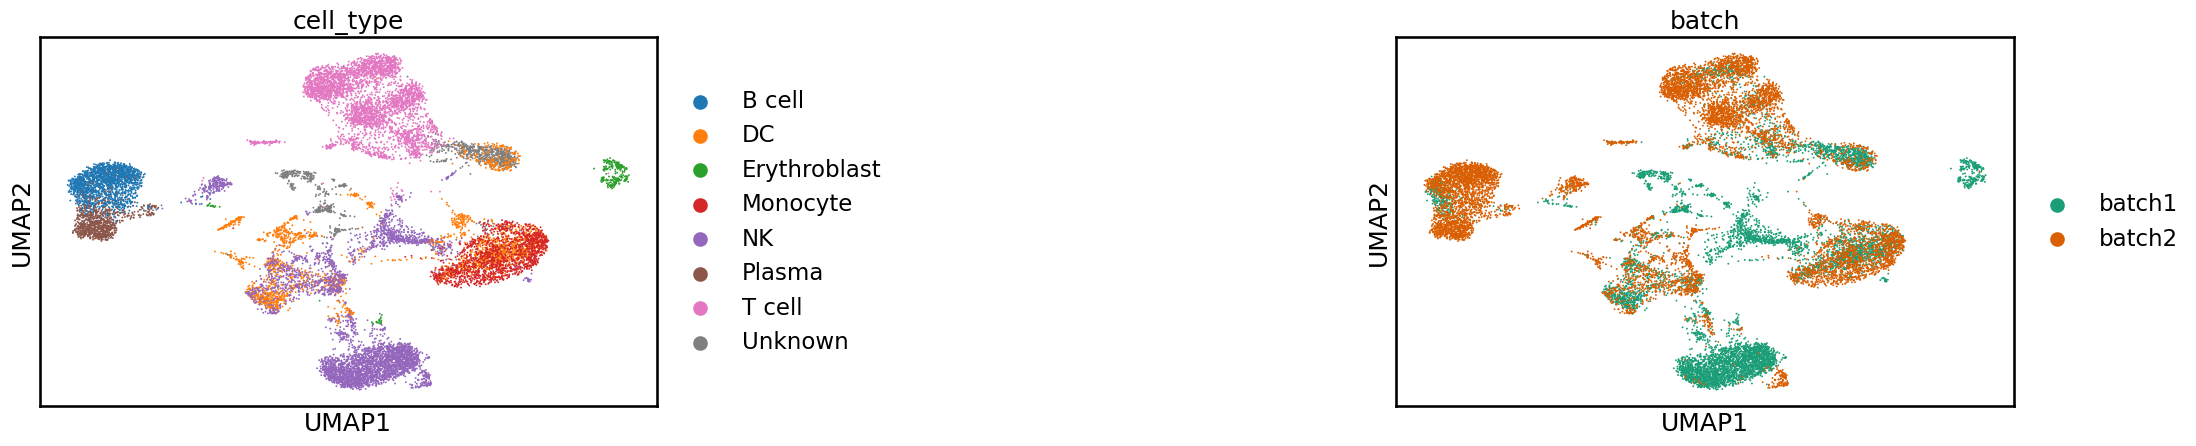

In [122]:
# Reset the batch colours because we deleted them earlier
adata_seurat.uns[batch_key + "_colors"] = [
    "#1b9e77",
    "#d95f02"
]
sc.tl.pca(adata_seurat)
sc.pp.neighbors(adata_seurat)
sc.tl.umap(adata_seurat)
sc.pl.umap(adata_seurat, color=[label_key, batch_key], wspace=1)

## Benchmarking

In [123]:
metrics_scvi = scib.metrics.metrics_fast(
    adata, adata_scvi, batch_key, label_key, embed="X_scVI"
)
metrics_scanvi = scib.metrics.metrics_fast(
    adata, adata_scanvi, batch_key, label_key, embed="X_scANVI"
)
metrics_bbknn = scib.metrics.metrics_fast(adata, adata_bbknn, batch_key, label_key)
metrics_seurat = scib.metrics.metrics_fast(adata, adata_seurat, batch_key, label_key)
metrics_hvg = scib.metrics.metrics_fast(adata, adata_hvg, batch_key, label_key)

Silhouette score...
PC regression...
computing PCA
    with n_comps=50


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:28)
computing PCA
    with n_comps=10
    finished (0:00:00)
Isolated labels ASW...


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


Graph connectivity...


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See htt

filtered out 141 genes that are detected in less than 1 cells
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
filtered out 27 genes that are detected in less than 1 cells
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
filtered out 141 genes that are detected in less than 1 cells
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
filtered out 27 genes that are detected in less than 1 cells


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and t

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
Silhouette score...


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PC regression...
computing PCA
    with n_comps=50


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:27)
computing PCA
    with n_comps=10
    finished (0:00:00)
Isolated labels ASW...


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


Graph connectivity...


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See htt

filtered out 141 genes that are detected in less than 1 cells
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
filtered out 27 genes that are detected in less than 1 cells
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
filtered out 141 genes that are detected in less than 1 cells
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
filtered out 27 genes that are detected in less than 1 cells


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and t

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
Silhouette score...


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PC regression...
computing PCA
    with n_comps=50


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:27)
computing PCA
    with n_comps=50


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:01)
Isolated labels ASW...
Graph connectivity...


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See htt

filtered out 141 genes that are detected in less than 1 cells
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
filtered out 27 genes that are detected in less than 1 cells
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
filtered out 141 genes that are detected in less than 1 cells
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
filtered out 27 genes that are detected in less than 1 cells


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and t

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
Silhouette score...


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PC regression...
computing PCA
    with n_comps=50


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:27)
computing PCA
    with n_comps=50


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:02)
Isolated labels ASW...
Graph connectivity...


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See htt

filtered out 141 genes that are detected in less than 1 cells
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
filtered out 27 genes that are detected in less than 1 cells
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
filtered out 55 genes that are detected in less than 1 cells


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
filtered out 27 genes that are detected in less than 1 cells


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
Silhouette score...


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PC regression...
computing PCA
    with n_comps=50


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:27)
computing PCA
    with n_comps=50


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:01)
Isolated labels ASW...
Graph connectivity...


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See htt

filtered out 141 genes that are detected in less than 1 cells
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
filtered out 27 genes that are detected in less than 1 cells
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
filtered out 141 genes that are detected in less than 1 cells
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
filtered out 27 genes that are detected in less than 1 cells


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and t

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)


/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [124]:
metrics_hvg

0
NMI_cluster/label               NaN
ARI_cluster/label               NaN
ASW_label                  0.608499
ASW_label/batch            0.649218
PCR_batch                  0.425587
cell_cycle_conservation         NaN
isolated_label_F1               NaN
isolated_label_silhouette  0.702588
graph_conn                 0.973241
kBET                            NaN
iLISI                           NaN
cLISI                           NaN
hvg_overlap                1.000000
trajectory                      NaN

In [125]:
# Concatenate metrics results
metrics = pd.concat(
    [metrics_scvi, metrics_scanvi, metrics_bbknn, metrics_seurat, metrics_hvg],
    axis="columns",
)
# Set methods as column names
metrics = metrics.set_axis(
    ["scVI", "scANVI", "BBKNN", "Seurat", "Unintegrated"], axis="columns"
)
# Select only the fast metrics
metrics = metrics.loc[
    [
        "ASW_label",
        "ASW_label/batch",
        "PCR_batch",
        "isolated_label_silhouette",
        "graph_conn",
        "hvg_overlap",
    ],
    :,
]
# Transpose so that metrics are columns and methods are rows
metrics = metrics.T
# Remove the HVG overlap metric because it's not relevant to embedding outputs
metrics = metrics.drop(columns=["hvg_overlap"])
metrics

ASW_label  ASW_label/batch  PCR_batch  \
scVI           0.558117         0.785552   0.926892   
scANVI         0.586362         0.779746   0.892277   
BBKNN          0.615741         0.665837   0.425587   
Seurat         0.588623         0.766716   0.623619   
Unintegrated   0.608499         0.649218   0.425587   

              isolated_label_silhouette  graph_conn  
scVI                           0.593441    0.996211  
scANVI                         0.634182    0.988465  
BBKNN                          0.698274    0.912248  
Seurat                         0.668922    0.988045  
Unintegrated                   0.702588    0.973241

In [126]:
metrics.style.background_gradient(cmap="Blues")

/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


In [127]:
metrics_scaled = (metrics - metrics.min()) / (metrics.max() - metrics.min())
metrics_scaled.style.background_gradient(cmap="Blues")

/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


In [128]:
metrics_scaled["Batch"] = metrics_scaled[
    ["ASW_label/batch", "PCR_batch", "graph_conn"]
].mean(axis=1)
metrics_scaled["Bio"] = metrics_scaled[["ASW_label", "isolated_label_silhouette"]].mean(
    axis=1
)
metrics_scaled.style.background_gradient(cmap="Blues")

/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


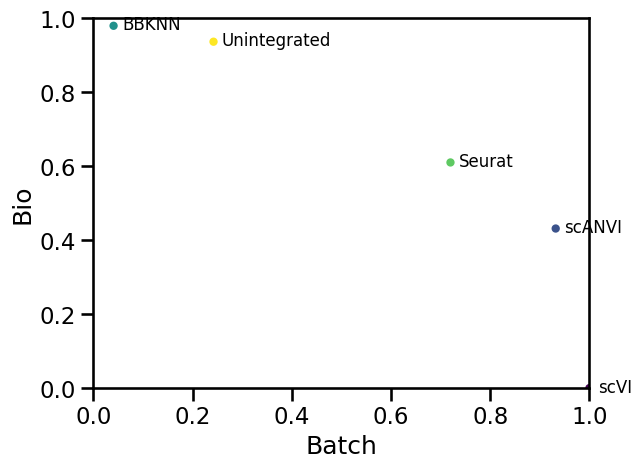

In [129]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
metrics_scaled.plot.scatter(
    x="Batch",
    y="Bio",
    c=range(len(metrics_scaled)),
    ax=ax,
)

for k, v in metrics_scaled[["Batch", "Bio"]].iterrows():
    ax.annotate(
        k,
        v,
        xytext=(6, -3),
        textcoords="offset points",
        family="sans-serif",
        fontsize=12,
    )

In [130]:
metrics_scaled["Overall"] = 0.4 * metrics_scaled["Batch"] + 0.6 * metrics_scaled["Bio"]
metrics_scaled.style.background_gradient(cmap="Blues")

/home/ajan/.conda/envs/scrnaseq-jupyter/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


<Axes: >

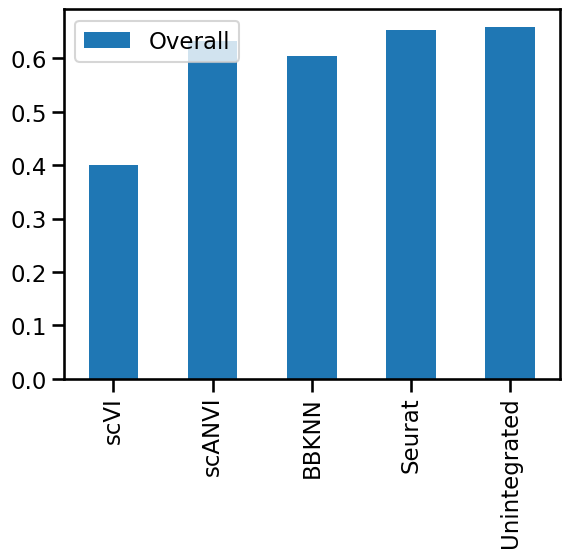

In [131]:
metrics_scaled.plot.bar(y="Overall")